In [1]:
%store -r __toolboxforsalesdata

In [2]:
__toolboxforsalesdata

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
for_index = pd.read_csv('test.csv')

In [10]:
train_df = pd.read_csv('train_new_feature.csv')

In [11]:
old_train_df = pd.read_csv('train_new_feature.csv')

In [12]:
old_test_df = pd.read_csv('test_new_feature.csv')

In [13]:
test_df = pd.read_csv('test_new_feature.csv')

In [14]:
#Trying features from trees.

In [15]:
train_df['num_vessels_and_angina_less_one'] = (train_df['exercise_induced_angina'] < 1) & (train_df['number_of_major_vessels']<1)
train_df['num_vessels_and_angina_less_one'] = train_df['num_vessels_and_angina_less_one'].astype('int64')

In [17]:
from catboost import CatBoostClassifier

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_df['age_sex_bp'] = train_df['age']*train_df['sex']*train_df['resting_blood_pressure']
train_df['age_bp'] = train_df['age']*train_df['resting_blood_pressure']

In [20]:
#Need for mean encoding? no.

In [21]:
train_df.groupby('thal')['class'].mean()

thal
3    0.218535
6    0.561900
7    0.753792
Name: class, dtype: float64

In [22]:
kk = train_df.groupby('chest').size().reset_index() #Ding ding.

In [23]:
train_df['chest_cat'] = 'O'
train_df.loc[train_df['chest'] == 4, 'chest_cat'] = 'A'
train_df.loc[train_df['chest'] == 3, 'chest_cat'] = 'B'

In [24]:
train_df.groupby('chest_cat')['class'].mean() #This works

chest_cat
A    0.702450
B    0.219477
O    0.197894
Name: class, dtype: float64

In [25]:
kk = train_df.groupby('oldpeak').size().reset_index() #Ding ding.

In [26]:
train_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,...,age_sex,sex_chest,age_chest,cholestoral_age_sex,big_mix,class,num_vessels_and_angina_less_one,age_sex_bp,age_bp,chest_cat
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,...,0.000000,0.000000,196.828496,0.000000,0.000000,1,0,0.000000,8020.572601,A
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,...,53.628425,1.741596,93.399050,14826.898959,0.000000,0,1,6984.229822,6984.229822,O
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,...,49.591426,4.000000,198.365704,11073.791065,204116.937519,1,0,7289.890626,7289.890626,A
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,...,58.991445,4.000000,235.965780,11045.882674,46401.726833,1,0,6628.818119,6628.818119,A
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,...,51.053602,1.954609,99.789830,12175.409427,0.000000,0,0,7047.033191,7047.033191,O


In [27]:
np.sum(pd.isnull(train_df), axis = 0)

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
age_sex                                 0
sex_chest                               0
age_chest                               0
cholestoral_age_sex                     0
big_mix                                 0
class                                   0
num_vessels_and_angina_less_one         0
age_sex_bp                              0
age_bp                                  0
chest_cat                               0
dtype: int64

In [28]:
categorical_features_indices = np.where(train_df.drop('class',axis = 1).dtypes == 'object')[0]

In [29]:
len(train_df.drop('class',axis = 1).columns)

22

In [30]:
categorical_features_indices

array([21])

In [31]:
train_cv, val_cv = train_test_split(old_train_df)

In [32]:
params1 = {'iterations':10000, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}

In [33]:
cat_x = CatBoostClassifier(**params1)
cat_x.fit(train_cv.drop('class',axis = 1), train_cv['class'],eval_set=(val_cv.drop('class',axis = 1), val_cv['class']),verbose = 1, plot = True)

Widget Javascript not detected.  It may not be installed or enabled properly.


0:	learn: 0.8648667	test: 0.8652733	best: 0.8652733 (0)	total: 205ms	remaining: 34m 14s
1:	learn: 0.8780556	test: 0.8782533	best: 0.8782533 (1)	total: 348ms	remaining: 29m 1s
2:	learn: 0.8765800	test: 0.8766400	best: 0.8782533 (1)	total: 507ms	remaining: 28m 10s
3:	learn: 0.8788733	test: 0.8789000	best: 0.8789000 (3)	total: 701ms	remaining: 29m 12s
4:	learn: 0.8814400	test: 0.8817600	best: 0.8817600 (4)	total: 886ms	remaining: 29m 31s
5:	learn: 0.8856956	test: 0.8862200	best: 0.8862200 (5)	total: 1.04s	remaining: 29m 1s
6:	learn: 0.8869933	test: 0.8873133	best: 0.8873133 (6)	total: 1.19s	remaining: 28m 22s
7:	learn: 0.8889422	test: 0.8896067	best: 0.8896067 (7)	total: 1.38s	remaining: 28m 43s
8:	learn: 0.8906444	test: 0.8917667	best: 0.8917667 (8)	total: 1.73s	remaining: 31m 59s
9:	learn: 0.8912222	test: 0.8921533	best: 0.8921533 (9)	total: 2.02s	remaining: 33m 42s
10:	learn: 0.8922467	test: 0.8932533	best: 0.8932533 (10)	total: 2.22s	remaining: 33m 33s
11:	learn: 0.8931800	test: 0.894

KeyboardInterrupt: 

In [ ]:
#DOnt delete this cell

In [ ]:
from catboost import Pool

In [613]:
feat_imp = cat_x.get_feature_importance(Pool(train_cv.drop('class',axis = 1)))

In [614]:
len(feat_imp)

18

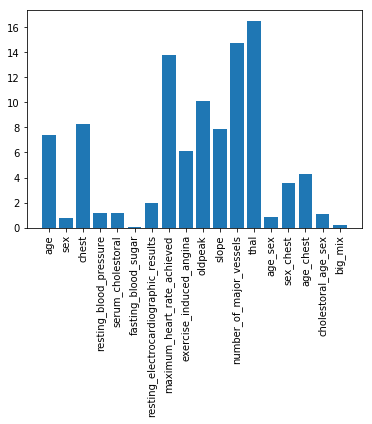

In [615]:
plt.figure()
plt.bar(train_cv.drop('class',axis = 1).columns.values, feat_imp)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Catboost submission.

In [558]:
rf_x = RandomForestClassifier(n_estimators=500, max_depth=8, max_features='sqrt', n_jobs=-1, verbose = 1)

In [559]:
train_df_dummies= pd.get_dummies(train_df)

In [560]:
train_cv_dummies = pd.get_dummies(train_cv)

In [561]:
val_cv_dummies = pd.get_dummies(val_cv)

In [562]:
rf_x.fit(train_cv_dummies.drop('class', axis = 1), train_cv_dummies['class'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [563]:
rf_x.score(val_cv_dummies.drop('class', axis = 1), val_cv_dummies['class'])

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    3.4s finished


0.8891666666666667

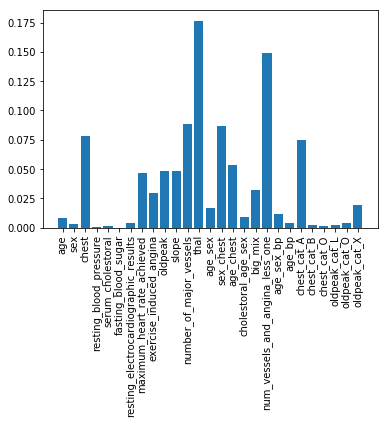

In [564]:
for_plot = pd.DataFrame({'col':train_cv_dummies.drop('class', axis = 1).columns.values,'imp':rf_x.feature_importances_})

plt.bar(for_plot['col'],for_plot['imp'])
plt.xticks(rotation = 90)
plt.show()

In [565]:
train_pred_rf_new_feat = rf_x.predict_proba(train_cv_dummies.drop('class', axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   11.1s finished


In [566]:
train_pred_cat_new_feat = cat_x.predict_proba(train_cv.drop('class', axis = 1))

In [567]:
val_pred_rf_new_feat = rf_x.predict_proba(val_cv_dummies.drop('class', axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    3.2s finished


In [568]:
val_pred_cat_new_feat = cat_x.predict_proba(val_cv.drop('class', axis = 1))

In [569]:
#Xg for the final stack
#Tuning for a while.
paramsx = {'max_depth': 10, 'eta': 0.001, 'silent': 1, 'objective': 'binary:logistic', 'subsample' : 1 ,'eval_metric': 'error'}

In [570]:
stack_cv_train_set = pd.DataFrame({'rf':train_pred_rf_new_feat[:,1], 'cat':train_pred_cat_new_feat[:,1]})

In [571]:
stack_cv_val_set = pd.DataFrame({'rf':val_pred_rf_new_feat[:,1], 'cat':val_pred_cat_new_feat[:,1]})

In [451]:
from sklearn.linear_model import LogisticRegression

In [572]:
lm_stack_x = LogisticRegression()

In [573]:
lm_stack_x.fit(stack_cv_train_set, train_cv['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [574]:
lm_stack_x.score(stack_cv_train_set, train_cv['class'])

0.9040288888888889

In [575]:
predx = lm_stack_x.predict(stack_cv_val_set)

In [576]:
params1_full = {'iterations':120, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,
          'thread_count':5, 'verbose':1}

In [536]:
cat_full = CatBoostClassifier(**params1_full)

In [617]:
cat_full.fit(old_train_df.drop('class',axis = 1), train_df['class'],eval_set=(old_train_df.drop('class',axis = 1), train_df['class']),verbose = 1, plot = True)

Widget Javascript not detected.  It may not be installed or enabled properly.


0:	learn: 0.8649633	test: 0.8649633	best: 0.8649633 (0)	total: 188ms	remaining: 25.8s
1:	learn: 0.8780933	test: 0.8780933	best: 0.8780933 (1)	total: 369ms	remaining: 25.1s
2:	learn: 0.8750267	test: 0.8750267	best: 0.8780933 (1)	total: 585ms	remaining: 26.3s
3:	learn: 0.8788350	test: 0.8788350	best: 0.8788350 (3)	total: 773ms	remaining: 25.9s
4:	learn: 0.8819567	test: 0.8819567	best: 0.8819567 (4)	total: 998ms	remaining: 26.6s
5:	learn: 0.8859833	test: 0.8859833	best: 0.8859833 (5)	total: 1.16s	remaining: 25.6s
6:	learn: 0.8869750	test: 0.8869750	best: 0.8869750 (6)	total: 1.4s	remaining: 26.1s
7:	learn: 0.8894733	test: 0.8894733	best: 0.8894733 (7)	total: 1.57s	remaining: 25.5s
8:	learn: 0.8913400	test: 0.8913400	best: 0.8913400 (8)	total: 1.78s	remaining: 25.5s
9:	learn: 0.8919983	test: 0.8919983	best: 0.8919983 (9)	total: 1.95s	remaining: 25s
10:	learn: 0.8935467	test: 0.8935467	best: 0.8935467 (10)	total: 2.24s	remaining: 25.9s
11:	learn: 0.8945900	test: 0.8945900	best: 0.8945900 (1

94:	learn: 0.9035117	test: 0.9035117	best: 0.9035117 (94)	total: 20.6s	remaining: 9.3s
95:	learn: 0.9036717	test: 0.9036717	best: 0.9036717 (95)	total: 20.8s	remaining: 9.09s
96:	learn: 0.9036800	test: 0.9036800	best: 0.9036800 (96)	total: 21s	remaining: 8.88s
97:	learn: 0.9036633	test: 0.9036633	best: 0.9036800 (96)	total: 21.2s	remaining: 8.66s
98:	learn: 0.9036933	test: 0.9036933	best: 0.9036933 (98)	total: 21.4s	remaining: 8.45s
99:	learn: 0.9037100	test: 0.9037100	best: 0.9037100 (99)	total: 21.6s	remaining: 8.21s
100:	learn: 0.9037317	test: 0.9037317	best: 0.9037317 (100)	total: 21.8s	remaining: 7.99s
101:	learn: 0.9037783	test: 0.9037783	best: 0.9037783 (101)	total: 22s	remaining: 7.75s
102:	learn: 0.9038733	test: 0.9038733	best: 0.9038733 (102)	total: 22.2s	remaining: 7.55s
103:	learn: 0.9038867	test: 0.9038867	best: 0.9038867 (103)	total: 22.6s	remaining: 7.39s
104:	learn: 0.9039067	test: 0.9039067	best: 0.9039067 (104)	total: 22.8s	remaining: 7.16s
105:	learn: 0.9039317	test:

In [538]:
#Preparing test.
test_df['num_vessels_and_angina_less_one'] = (test_df['exercise_induced_angina'] < 1) & (test_df['number_of_major_vessels']<1)
test_df['num_vessels_and_angina_less_one'] = test_df['num_vessels_and_angina_less_one'].astype('int64')

In [539]:
test_df['chest_cat'] = 'O'
test_df.loc[test_df['chest'] == 4, 'chest_cat'] = 'A'
test_df.loc[test_df['chest'] == 3, 'chest_cat'] = 'B'

In [540]:
test_df['oldpeak_cat'] = 'X'
test_df.loc[train_df['oldpeak']<2.157, 'oldpeak_cat'] = 'L'
test_df.loc[train_df['oldpeak']==0, 'oldpeak_cat'] = 'O'

In [545]:
test_df['age_sex_bp'] = test_df['age']*test_df['sex']*test_df['resting_blood_pressure']
test_df['age_bp'] = test_df['age']*test_df['resting_blood_pressure']

In [620]:
old_test_df = old_test_df[old_train_df.drop('class',axis = 1).columns]

In [625]:
catboost_pred_train_proba = cat_full.predict_proba(old_train_df.drop('class',axis = 1))

In [626]:
catboost_pred_proba = cat_full.predict_proba(old_test_df)

In [621]:
catboost_pred = cat_full.predict(old_test_df)

In [622]:
catboost_pred = catboost_pred.astype(np.int64)

In [623]:
submit = pd.DataFrame({'ID': for_index['ID'], 'class':catboost_pred})
submit.to_csv('catboost.csv', index = False)

In [100]:
old_train_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,...,thal,age_sex,sex_chest,age_chest,cholestoral_age_sex,big_mix,class,chest_cat_mean_enc,num_vessels_and_angina_less_one,oldpeak*slope
0,49.207124,0,4.000000,162.996167,181.108682,0,148.227858,1,0.944547,2,...,3,0.000000,0.000000,196.828496,0.000000,0.000000,1,0.702245,0,1.889094
1,53.628425,1,1.741596,130.233730,276.474630,2,152.917139,0,0.119070,2,...,3,53.628425,1.741596,93.399050,14826.898959,0.000000,0,0.198040,1,0.238140
2,49.591426,1,4.000000,146.999012,223.300517,2,102.352090,1,1.616747,2,...,7,49.591426,4.000000,198.365704,11073.791065,204116.937519,1,0.702800,0,3.233494
3,58.991445,1,4.000000,112.369143,187.245501,0,158.164750,1,0.000000,1,...,7,58.991445,4.000000,235.965780,11045.882674,46401.726833,1,0.702343,0,0.000000
4,51.053602,1,1.954609,138.032047,238.482868,0,172.540828,0,1.150464,1,...,3,51.053602,1.954609,99.789830,12175.409427,0.000000,0,0.198025,0,1.150464


In [577]:
rf_full = RandomForestClassifier(n_estimators=500, max_depth=8, max_features='sqrt', n_jobs=-1, verbose = 1)

In [578]:
rf_full.fit(train_df_dummies.drop('class', axis = 1), train_df_dummies['class'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [579]:
train_pred_rf_new_feat_full = rf_full.predict_proba(train_df_dummies.drop('class', axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   14.6s finished


In [580]:
train_pred_cat_new_feat_full = cat_full.predict_proba(train_df.drop('class', axis = 1))

In [581]:
stack_full_train_set = pd.DataFrame({'rf':train_pred_rf_new_feat_full[:,1], 'cat':train_pred_cat_new_feat_full[:,1]})

In [587]:
test_df_dummies = pd.get_dummies(test_df)

In [589]:
test_pred_rf_new_feat_full = rf_full.predict_proba(test_df_dummies)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    9.4s finished


In [590]:
test_pred_cat_new_feat_full = cat_full.predict_proba(old_test_df)

In [627]:
stack_full_test_set = pd.DataFrame({'rf':test_pred_rf_new_feat_full[:,1], 'cat':test_pred_cat_new_feat_full[:,1]})

In [628]:
lm_stack_full = LogisticRegression()

In [629]:
lm_stack_full.fit(stack_full_train_set, train_df['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [630]:
lm_stack_full.score(stack_full_train_set, train_df['class'])

0.9038633333333334

In [631]:
stack_cat_rf_pred_new_feat = lm_stack_full.predict(stack_full_test_set)

In [632]:
sum(stack_cat_rf_pred_new_feat!=catboost_pred)

2223

In [633]:
submit = pd.DataFrame({'ID': for_index['ID'], 'class':stack_cat_rf_pred_new_feat})

In [634]:
submit.to_csv('stack2.csv', index = False)

In [ ]:
#Currently catboost is trained on stage1 feature engineering and rf on stage2 feature engineering.
#Both then stacked by logistic regression.

In [ ]:
#Now retraining rf with old features just to stack with catboost with old features.

In [635]:
rf_full2 = RandomForestClassifier(n_estimators=500, max_depth=8, max_features='sqrt', n_jobs=-1, verbose = 1)

In [636]:
rf_full2.fit(old_train_df.drop('class', axis = 1), train_df_dummies['class'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [641]:
train_rf_full2 = rf_full2.predict_proba(old_train_df.drop('class', axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   12.2s finished


In [637]:
test_rf_full2 = rf_full2.predict_proba(old_test_df)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   10.0s finished


In [642]:
train_cat_full2 = cat_full.predict_proba(old_train_df.drop('class', axis = 1))

In [643]:
test_cat_full2 = cat_full.predict_proba(old_test_df)

In [644]:
stack_full_train_set_2 = pd.DataFrame({'rf':train_rf_full2[:,1], 'cat':train_cat_full2[:,1]})

In [646]:
stack_full_test_set_2 = pd.DataFrame({'rf':test_rf_full2[:,1], 'cat':test_cat_full2[:,1]})

In [647]:
lm_stack_full_2 = LogisticRegression()

In [649]:
lm_stack_full_2.fit(stack_full_train_set_2, train_df['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [650]:
stack_cat_rf_pred_feat_round1 = lm_stack_full_2.predict(stack_full_test_set_2)

In [652]:
submit = pd.DataFrame({'ID': for_index['ID'], 'class':stack_cat_rf_pred_feat_round1})

In [653]:
submit.to_csv('stack_feature_rnd1_both_cat_rf.csv', index = False)

In [ ]:
#Stacking is making model worse on public.

In [ ]:
#Now only a good feature can break the barrier of 0.9038 to advance further.

In [654]:
old_train_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,age_sex,sex_chest,age_chest,cholestoral_age_sex,big_mix,class
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,0.000000,0.000000,196.828496,0.000000,0.000000,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,53.628425,1.741596,93.399050,14826.898959,0.000000,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,49.591426,4.000000,198.365704,11073.791065,204116.937519,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,58.991445,4.000000,235.965780,11045.882674,46401.726833,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,51.053602,1.954609,99.789830,12175.409427,0.000000,0


In [34]:
#This is one required feature.
old_train_df['chest_cat'] = 'A'
old_train_df.loc[old_train_df['chest'] == 3, 'chest_cat'] = 'B'
old_train_df.loc[old_train_df['chest'] == 4, 'chest_cat'] = 'C'

In [35]:
#Chest cat_mean enc by k_fold.
from sklearn.model_selection import KFold

In [36]:
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(old_train_df)

5

In [37]:
old_train_df['chest_cat_mean_enc'] = np.nan

In [38]:
for train_index, test_index in kf.split(old_train_df):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = old_train_df.iloc[train_index,:], old_train_df.iloc[test_index,:]
    for_map = X_train.groupby('chest_cat')['class'].mean()
    old_train_df['chest_cat_mean_enc'].iloc[test_index] = old_train_df['chest_cat'].iloc[test_index].map(for_map)

TRAIN: [     0      1      2 ... 599997 599998 599999] TEST: [     9     13     14 ... 599963 599972 599986]


/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


TRAIN: [     0      1      2 ... 599997 599998 599999] TEST: [     3      4      7 ... 599990 599992 599993]
TRAIN: [     0      2      3 ... 599996 599997 599999] TEST: [     1      6     16 ... 599991 599994 599998]
TRAIN: [     0      1      3 ... 599997 599998 599999] TEST: [     2     15     18 ... 599976 599984 599989]
TRAIN: [     1      2      3 ... 599993 599994 599998] TEST: [     0      5      8 ... 599996 599997 599999]


In [39]:
old_train_df.drop('chest_cat', axis = 1,inplace = True)

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


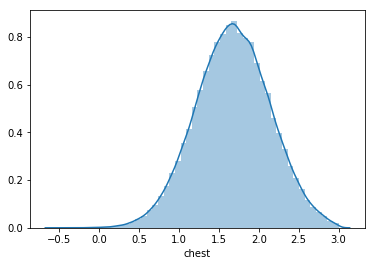

In [40]:
sns.distplot(old_train_df[old_train_df['chest'] < 3]['chest'])

In [41]:
old_train_df.groupby('chest_cat')['class'].mean()

KeyError: 'chest_cat'

In [ ]:
#This too was good.

In [42]:
old_train_df['num_vessels_and_angina_less_one'] = (old_train_df['exercise_induced_angina'] < 1) & (old_train_df['number_of_major_vessels']<1)
old_train_df['num_vessels_and_angina_less_one'] = old_train_df['num_vessels_and_angina_less_one'].astype('int64')

In [43]:
min(old_train_df['slope'])

1

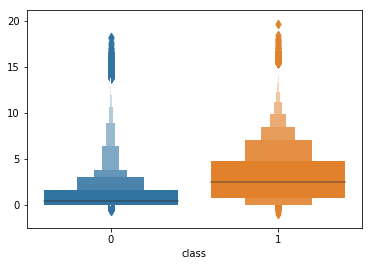

In [44]:
#Can old peak be made categorical ie. binned?
sns.lvplot(old_train_df['class'], old_train_df['oldpeak']*old_train_df['slope'])
plt.show()

In [45]:
max(old_train_df['oldpeak'])

6.803372

In [46]:
min(old_train_df['oldpeak'])

-0.8067880000000001

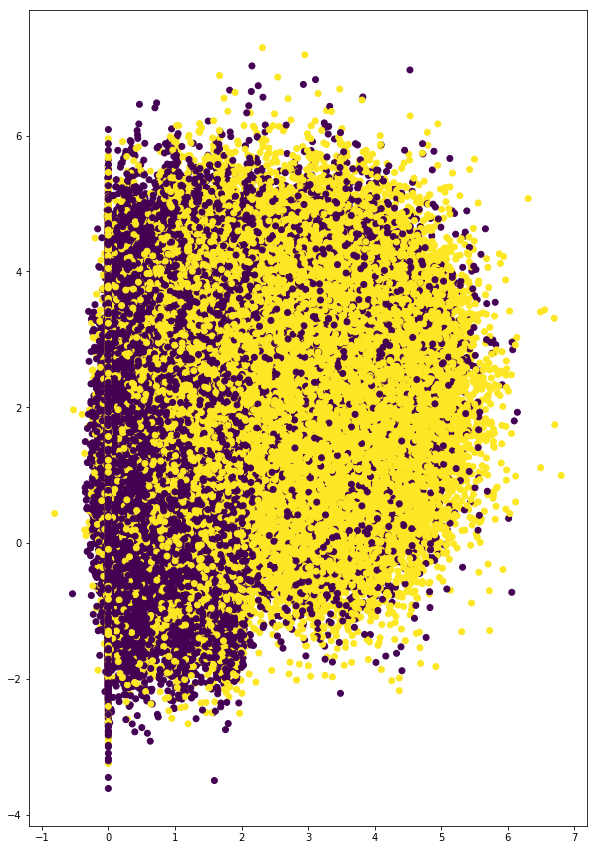

In [47]:
plt.figure(figsize=(10,15))
plt.scatter(old_train_df['oldpeak'], old_train_df['slope']+np.random.randn(len(old_train_df)),c = old_train_df['class'])
plt.show()

In [48]:
#less old peak

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


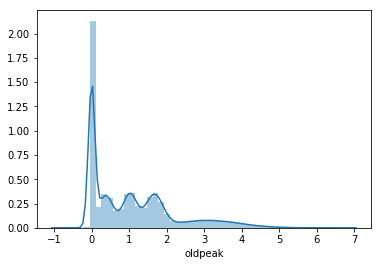

In [49]:
sns.distplot(old_train_df['oldpeak'])

In [50]:
#No multiplying. #Two new features, lets see

In [51]:
old_train_df.drop('fasting_blood_sugar', axis = 1, inplace = True)

In [52]:
old_train_df['oldpeak*slope'] = old_train_df['oldpeak']*old_train_df['slope']

In [53]:
old_train_cv , old_val_cv = train_test_split(old_train_df)

In [54]:
#Yes some categories

In [55]:
categorical_features_indices = np.where(old_train_df.drop('class',axis = 1).dtypes == 'object')[0]

In [56]:
params1 = {'iterations':10000, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}

In [95]:
old_train_cv.columns

Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'age_sex', 'sex_chest', 'age_chest',
       'cholestoral_age_sex', 'big_mix', 'class', 'chest_cat_mean_enc',
       'num_vessels_and_angina_less_one', 'oldpeak*slope'],
      dtype='object')

In [57]:
cat_x_2 = CatBoostClassifier(**params1)
cat_x_2.fit(old_train_cv.drop('class',axis = 1), old_train_cv['class'],eval_set=(old_val_cv.drop('class',axis = 1), old_val_cv['class']),verbose = 1,cat_features = categorical_features_indices)

0:	learn: 0.8711044	test: 0.8705667	best: 0.8705667 (0)	total: 150ms	remaining: 25m
1:	learn: 0.8746467	test: 0.8746600	best: 0.8746600 (1)	total: 275ms	remaining: 22m 53s
2:	learn: 0.8783267	test: 0.8786067	best: 0.8786067 (2)	total: 415ms	remaining: 23m 4s
3:	learn: 0.8803778	test: 0.8810800	best: 0.8810800 (3)	total: 603ms	remaining: 25m 6s
4:	learn: 0.8839956	test: 0.8843267	best: 0.8843267 (4)	total: 775ms	remaining: 25m 49s
5:	learn: 0.8865289	test: 0.8869133	best: 0.8869133 (5)	total: 926ms	remaining: 25m 42s
6:	learn: 0.8878311	test: 0.8879133	best: 0.8879133 (6)	total: 1.07s	remaining: 25m 25s
7:	learn: 0.8899533	test: 0.8899000	best: 0.8899000 (7)	total: 1.26s	remaining: 26m 8s
8:	learn: 0.8907533	test: 0.8910533	best: 0.8910533 (8)	total: 1.47s	remaining: 27m 9s
9:	learn: 0.8920156	test: 0.8922200	best: 0.8922200 (9)	total: 1.61s	remaining: 26m 52s
10:	learn: 0.8929667	test: 0.8932733	best: 0.8932733 (10)	total: 1.74s	remaining: 26m 23s
11:	learn: 0.8935267	test: 0.8938800	b

92:	learn: 0.9034978	test: 0.9035733	best: 0.9035733 (92)	total: 16.7s	remaining: 29m 40s
93:	learn: 0.9034978	test: 0.9035200	best: 0.9035733 (92)	total: 17s	remaining: 29m 51s
94:	learn: 0.9034756	test: 0.9034467	best: 0.9035733 (92)	total: 17.2s	remaining: 29m 55s
95:	learn: 0.9035200	test: 0.9034200	best: 0.9035733 (92)	total: 17.4s	remaining: 29m 53s
96:	learn: 0.9035178	test: 0.9034400	best: 0.9035733 (92)	total: 17.6s	remaining: 29m 53s
97:	learn: 0.9035289	test: 0.9033467	best: 0.9035733 (92)	total: 17.7s	remaining: 29m 49s
98:	learn: 0.9035511	test: 0.9033933	best: 0.9035733 (92)	total: 17.8s	remaining: 29m 44s
99:	learn: 0.9035511	test: 0.9034000	best: 0.9035733 (92)	total: 18s	remaining: 29m 43s
100:	learn: 0.9035378	test: 0.9033733	best: 0.9035733 (92)	total: 18.2s	remaining: 29m 39s
101:	learn: 0.9035267	test: 0.9033867	best: 0.9035733 (92)	total: 18.3s	remaining: 29m 37s
102:	learn: 0.9035733	test: 0.9033333	best: 0.9035733 (92)	total: 18.5s	remaining: 29m 33s
103:	learn:

182:	learn: 0.9044533	test: 0.9038000	best: 0.9039867 (156)	total: 32.6s	remaining: 29m 7s
183:	learn: 0.9044667	test: 0.9038067	best: 0.9039867 (156)	total: 32.8s	remaining: 29m 7s
184:	learn: 0.9044933	test: 0.9038667	best: 0.9039867 (156)	total: 32.9s	remaining: 29m 7s
185:	learn: 0.9044778	test: 0.9038400	best: 0.9039867 (156)	total: 33.1s	remaining: 29m 6s
186:	learn: 0.9045000	test: 0.9038000	best: 0.9039867 (156)	total: 33.2s	remaining: 29m 4s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9039866667
bestIteration = 156

Shrink model to first 157 iterations.


In [59]:
from catboost import Pool

In [60]:
feat_imp = cat_x_2.get_feature_importance(Pool(old_train_cv.drop('class',axis = 1), cat_features=categorical_features_indices))

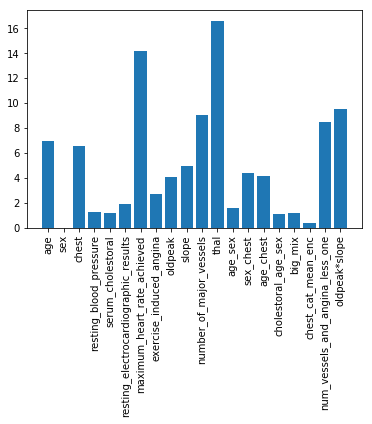

In [61]:
plt.figure()
plt.bar(old_train_cv.drop('class',axis = 1).columns.values, feat_imp)
plt.xticks(rotation = 90)
plt.show()

In [64]:
#Slight new features. cat_x_2 training fully.
params1_full = {'iterations':156, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,
          'thread_count':5, 'verbose':1}

In [65]:
cat_full_2 = CatBoostClassifier(**params1_full)
cat_full_2.fit(old_train_df.drop('class',axis = 1), old_train_df['class'],eval_set=(old_train_df.drop('class',axis = 1), old_train_df['class']),verbose = 1,cat_features = categorical_features_indices)

0:	learn: 0.8709567	test: 0.8709567	best: 0.8709567 (0)	total: 196ms	remaining: 30.4s
1:	learn: 0.8749167	test: 0.8749167	best: 0.8749167 (1)	total: 383ms	remaining: 29.5s
2:	learn: 0.8788683	test: 0.8788683	best: 0.8788683 (2)	total: 644ms	remaining: 32.8s
3:	learn: 0.8804100	test: 0.8804100	best: 0.8804100 (3)	total: 853ms	remaining: 32.4s
4:	learn: 0.8834467	test: 0.8834467	best: 0.8834467 (4)	total: 1.12s	remaining: 33.9s
5:	learn: 0.8854383	test: 0.8854383	best: 0.8854383 (5)	total: 1.36s	remaining: 34.1s
6:	learn: 0.8865033	test: 0.8865033	best: 0.8865033 (6)	total: 1.6s	remaining: 34.2s
7:	learn: 0.8883867	test: 0.8883867	best: 0.8883867 (7)	total: 1.84s	remaining: 34s
8:	learn: 0.8898967	test: 0.8898967	best: 0.8898967 (8)	total: 2.08s	remaining: 34s
9:	learn: 0.8917183	test: 0.8917183	best: 0.8917183 (9)	total: 2.32s	remaining: 33.9s
10:	learn: 0.8917800	test: 0.8917800	best: 0.8917800 (10)	total: 2.56s	remaining: 33.7s
11:	learn: 0.8923567	test: 0.8923567	best: 0.8923567 (11)

94:	learn: 0.9037083	test: 0.9037083	best: 0.9037083 (94)	total: 25.2s	remaining: 16.2s
95:	learn: 0.9037067	test: 0.9037067	best: 0.9037083 (94)	total: 25.6s	remaining: 16s
96:	learn: 0.9037900	test: 0.9037900	best: 0.9037900 (96)	total: 25.9s	remaining: 15.8s
97:	learn: 0.9037883	test: 0.9037883	best: 0.9037900 (96)	total: 26.3s	remaining: 15.6s
98:	learn: 0.9038467	test: 0.9038467	best: 0.9038467 (98)	total: 26.5s	remaining: 15.3s
99:	learn: 0.9038550	test: 0.9038550	best: 0.9038550 (99)	total: 26.8s	remaining: 15s
100:	learn: 0.9038667	test: 0.9038667	best: 0.9038667 (100)	total: 27s	remaining: 14.7s
101:	learn: 0.9038767	test: 0.9038767	best: 0.9038767 (101)	total: 27.3s	remaining: 14.4s
102:	learn: 0.9038517	test: 0.9038517	best: 0.9038767 (101)	total: 27.6s	remaining: 14.2s
103:	learn: 0.9038900	test: 0.9038900	best: 0.9038900 (103)	total: 27.9s	remaining: 13.9s
104:	learn: 0.9038967	test: 0.9038967	best: 0.9038967 (104)	total: 28.2s	remaining: 13.7s
105:	learn: 0.9039300	test: 

In [67]:
#Changing old_test_df, making this temporarily for mapping.
old_train_df['chest_cat'] = 'A'
old_train_df.loc[old_train_df['chest'] == 3, 'chest_cat'] = 'B'
old_train_df.loc[old_train_df['chest'] == 4, 'chest_cat'] = 'C'

In [68]:
for_enc = old_train_df.groupby('chest_cat')['class'].mean()

In [69]:
#Changing old_test_df
#This is one required feature.
old_test_df['chest_cat'] = 'A'
old_test_df.loc[old_test_df['chest'] == 3, 'chest_cat'] = 'B'
old_test_df.loc[old_test_df['chest'] == 4, 'chest_cat'] = 'C'

In [70]:
old_test_df['chest_cat_mean_enc'] = old_test_df['chest_cat'].map(for_enc)

In [71]:
#Now dropping the temporiy old_train_df chest_cat

In [72]:
old_train_df.drop('chest_cat', axis = 1 , inplace = True)

In [73]:
old_test_df['num_vessels_and_angina_less_one'] = (old_test_df['exercise_induced_angina'] < 1) & (old_test_df['number_of_major_vessels']<1)
old_test_df['num_vessels_and_angina_less_one'] = old_test_df['num_vessels_and_angina_less_one'].astype('int64')

In [74]:
old_test_df['oldpeak*slope'] = old_test_df['oldpeak']*old_test_df['slope']

In [75]:
old_test_df.drop('chest_cat', axis = 1 , inplace = True)

In [76]:
catboost_2_pred = cat_full_2.predict(old_test_df)

In [77]:
catboost_2_pred = catboost_2_pred.astype(np.int)

In [81]:
submit = pd.DataFrame({'ID': for_index['ID'], 'class':catboost_2_pred})

In [82]:
submit.to_csv('catboost_2.csv', index = False)

In [83]:
submit.shape

(400000, 2)

In [ ]:
#Time for ensembling. Bring in KNN.

In [86]:
#Normalizing for knn

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler_cv = StandardScaler()

In [89]:
scaler_cv.fit(old_train_cv.drop('class', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
old_train_cv_std = scaler_cv.transform(old_train_cv.drop('class', axis = 1))

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_50 = KNeighborsClassifier(n_neighbors=1, n_jobs=5, verbose = 1)
knn_50.fit(old_train_cv_std, old_train_cv['class'])
knn_50.score(old_train_cv_std, old_train_cv['class'])

KeyboardInterrupt: 

KeyboardInterrupt: 

In [93]:
old_train_df.to_csv('train_new_features_2.csv', index = False)

In [94]:
old_test_df.to_csv('test_new_features_2.csv', index = False)

In [99]:
old_train_df.groupby('slope')['class'].mean()

slope
1    0.254294
2    0.635276
3    0.539182
Name: class, dtype: float64